<a href="https://colab.research.google.com/github/Beatoy/INTELIGENCIA-ARTIFICIAL/blob/main/%20MULTICAPA%20/COMBUSTIBLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Celda 1: instalar paquete y obtener dataset
!pip install ucimlrepo

# Importar función para descargar datasets desde UCI
from ucimlrepo import fetch_ucirepo

# Traer Auto MPG (id=9)
auto_mpg = fetch_ucirepo(id=9)

# Extraer features (X) y target (y) como DataFrames de pandas
X = auto_mpg.data.features
y = auto_mpg.data.targets

# Mostrar X y y (Colab renderizará)
X.head()
y.head()


,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [2]:
# Celda 2: inspección de nulos / info
# Mostrar información de X e y
X.info()
y.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [3]:
# Celda 3: concatenar y eliminar filas con NA
import pandas as pd

df = pd.concat([X, y], axis=1).dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   model_year    392 non-null    int64  
 6   origin        392 non-null    int64  
 7   mpg           392 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


In [4]:
# Celda 4: redefinir X e y (sin nulos) y dividir en train/test
X = df.drop('mpg', axis=1)
y = df['mpg']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

print(X_train.shape)
print(X_test.shape)


(313, 7)
(79, 7)


In [5]:
# Celda 5: escalado (StandardScaler)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # ajustar con train
X_test = scaler.transform(X_test)        # transformar test con mismos parámetros

# Comprobación opcional breve (media y std)
import numpy as np
print(f"Train mean sample (first 3 features): {np.round(X_train.mean(axis=0)[:3], 4)}")
print(f"Train std  sample (first 3 features): {np.round(X_train.std(axis=0)[:3], 4)}")


Train mean sample (first 3 features): [ 0. -0.  0.]
Train std  sample (first 3 features): [1. 1. 1.]


In [6]:
# Celda 6: definir la red neuronal secuencial para regresión
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # salida continua (mpg)
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Celda 7: compilar el modelo (Adam + MSE) y métricas RMSE
from tensorflow.keras.optimizers import Adam

learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

model.compile(
    optimizer=adam_optimizer,
    loss='mean_squared_error',
    metrics=['root_mean_squared_error']
)


In [8]:
# Celda 8: entrenar el modelo (5 épocas, batch_size=1) con validación
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=1,
    validation_data=(X_test, y_test)
)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 393.0371 - root_mean_squared_error: 19.4330 - val_loss: 18.5612 - val_root_mean_squared_error: 4.3083
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12.4479 - root_mean_squared_error: 3.5151 - val_loss: 13.9833 - val_root_mean_squared_error: 3.7394
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.4127 - root_mean_squared_error: 3.0575 - val_loss: 10.0665 - val_root_mean_squared_error: 3.1728
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.2967 - root_mean_squared_error: 2.8552 - val_loss: 13.4897 - val_root_mean_squared_error: 3.6728
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.5040 - root_mean_squared_error: 2.9012 - val_loss: 10.4241 - val_root_mean_squared_error: 3.2286


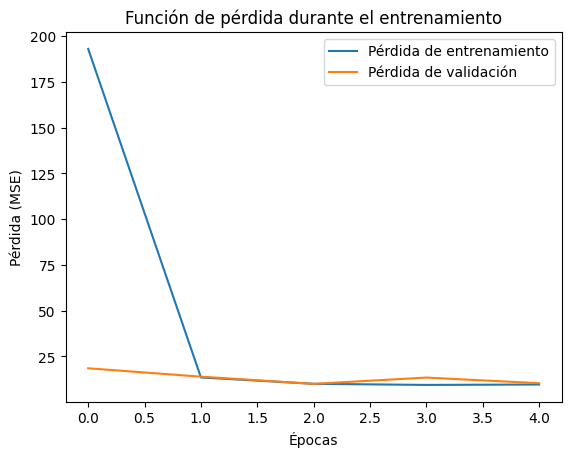

In [9]:
# Celda 9: graficar pérdida (train vs val)
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()


In [10]:
# Celda 10: evaluación en test y print del MAE aproximado (RMSE devuelto por Keras)
# Nota: evaluate devuelve (loss, root_mean_squared_error)
test_loss, test_rmse = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Mean Absolute Error: {test_rmse:.2f}')  # mantengo la impresión que tenías (nombre mostrado)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.1525 - root_mean_squared_error: 3.1843
Test Mean Absolute Error: 3.23


In [11]:
# Celda 11: predicciones y comparación (primeras filas)
predictions = model.predict(X_test)
import pandas as pd
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions.flatten()})
print(comparison.head())


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
   Actual  Predicted
0    23.0  22.570513
1    29.0  28.377945
2    32.4  33.889442
3    19.0  17.922880
4    38.0  38.347172


In [12]:
# Celda 12: métricas adicionales (R² y MSE)
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f'R²: {r2}')
print(f'MSE: {mse}')


R²: 0.8496280403747812
MSE: 10.42412637899082
